# 0.0 Clusterizacao - K-Means

## 0.1 Imports

In [ ]:
import pandas                                as pd
import numpy                                 as np

from sklearn                 import metrics  as mt
from sklearn                 import cluster  as ct
from sklearn.preprocessing   import StandardScaler

from matplotlib              import pyplot   as plt

## 0.2 Load Dataset

In [ ]:
path_X_training = './dataset/X_dataset.csv'
df_X_training = pd.read_csv(path_X_training)

In [ ]:
df_X_training.head(5)

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1.518613,0.191700,0.232053,-1.169593,1.913905,0.627586,0.573840,-0.659563,1.224884,0.251717,0.455285,0.970696,0.561341
1,0.246290,0.205534,-0.827996,-2.490847,0.018145,0.575862,0.510549,-0.820719,-0.544721,-0.293321,0.463415,0.780220,0.550642
2,0.196879,0.320158,1.109334,-0.268738,0.088358,0.627586,0.611814,-0.498407,2.135968,0.269020,0.447154,0.695971,0.646933
3,1.691550,0.239130,0.487926,-0.809251,0.930918,0.989655,0.664557,-0.981875,1.032155,1.186068,0.308943,0.798535,0.857347
4,0.295700,0.365613,1.840403,0.451946,1.281985,0.627586,0.495781,0.226796,0.401404,-0.319276,0.455285,0.608059,0.325963


## 0.3 Features

### 0.3.1 Pre-processamento Normalizacao

In [ ]:
# Escalonamento dos dados
scaler = StandardScaler()

X_scaled = scaler.fit_transform(df_X_training)

### 0.4.1 Encontrar o melhor valor para k

In [ ]:
clusters = np.arange(2, 11, 1)
ss_list = []

for k in clusters:
    # Define
    model = ct.KMeans(n_clusters=k, init='random', n_init=10, random_state=0)

    # Fit
    labels = model.fit_predict(X_scaled)

    # Performance
    ss = mt.silhouette_score(X_scaled, labels)
    ss_list.append(ss)

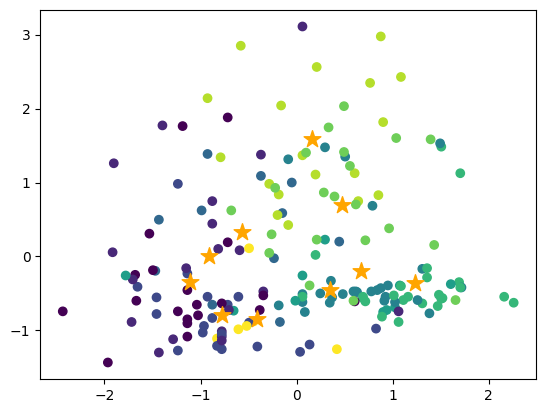

In [ ]:
plt.scatter( X_scaled[:,0], X_scaled[:,1], c=model.labels_ )

for i in range ( len ( model.cluster_centers_ ) ):
    plt.scatter( model.cluster_centers_[i, 0],
                 model.cluster_centers_[i, 1],
                 marker='*',
                 c='orange',
                 s=160)

In [ ]:
best_k = clusters[np.argmax(ss_list)]
best_score = max(ss_list)
print(f"Melhor valor de K: {best_k}")
print(f"Melhor Silhouette Score: {best_score:.4f}")

Melhor valor de K: 3
Melhor Silhouette Score: 0.2849


### 0.4.2 Visualizacao

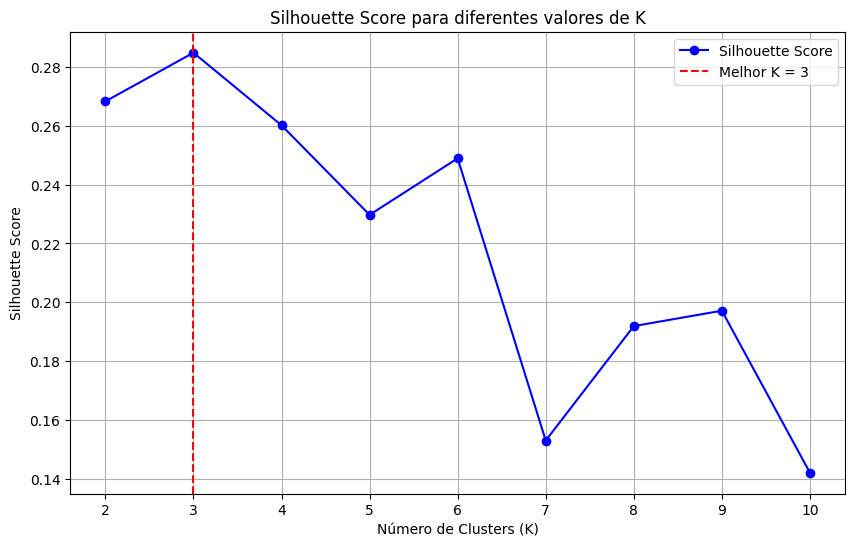

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(clusters, ss_list, marker='o', linestyle='-', color='b', label="Silhouette Score")
plt.axvline(x=best_k, color='r', linestyle='--', label=f'Melhor K = {best_k}')
plt.title("Silhouette Score para diferentes valores de K")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Silhouette Score")
plt.legend()
plt.grid()
plt.show()

# 1.0 Clusterizacao - K-Means


## 1.1 Imports

In [ ]:
import time
from IPython import display

import pandas                                as pd
import numpy                                 as np

from sklearn                 import metrics  as m
from sklearn                 import cluster  as c
from sklearn.preprocessing   import StandardScaler

from matplotlib              import pyplot   as plt

## 1.2 Load Dataset

In [ ]:
path_X_training = './dataset/X_dataset.csv'
df_X_training = pd.read_csv(path_X_training)

In [ ]:
from sklearn.cluster import AffinityPropagation, KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Escalonamento já feito, usar os dados diretamente
X_scaled = df_X_training.values

# Parâmetros para os métodos
p_values = np.linspace(-20, -200, 20)  # Valores para "preference" no Affinity Propagation
k_values = range(8, 21)  # Número de clusters para KMeans

# Resultados para Affinity Propagation
silhouette_affinity = []
best_affinity_model = None

for p in p_values:
    try:
        model = AffinityPropagation(preference=p, random_state=42)
        model.fit(X_scaled)
        labels = model.labels_

        # Verifica se os clusters são válidos
        if len(np.unique(labels)) >= 8:
            score = silhouette_score(X_scaled, labels)
            silhouette_affinity.append((p, score, model))
    except Exception:
        continue

# Melhor resultado de Affinity Propagation
if silhouette_affinity:
    best_affinity = max(silhouette_affinity, key=lambda x: x[1])
    best_affinity_preference, best_affinity_score, best_affinity_model = best_affinity
else:
    best_affinity_preference, best_affinity_score = None, None

# Resultados para KMeans
silhouette_kmeans = []
best_kmeans_model = None

for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_kmeans.append((k, score, model))

# Melhor resultado de KMeans
best_kmeans = max(silhouette_kmeans, key=lambda x: x[1])
best_k, best_kmeans_score, best_kmeans_model = best_kmeans

best_affinity_preference, best_affinity_score, len(np.unique(best_affinity_model.labels_)) if best_affinity_model else None, \
best_k, best_kmeans_score


In [ ]:
df_X_training.head(5)